In [1]:
%pip install joypy seaborn ridgeplot

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.0/49.0 kB 379.4 kB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 8.1 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.9/233.9 kB 7.5 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

from scripts.preprocess.utils import gc_percentage
from matplotlib.lines import Line2D

In [7]:
SELECTED_SPECIES = ['Sinorhizobium meliloti 1021', 'Bradyrhizobium japonicum USDA 110',
                    'Shigella flexneri 5a str. M90T', 'Burkholderia cenocepacia J2315',
                    'Escherichia coli str K-12 substr. MG1655',
                    'Pseudomonas putida strain KT2440',
                    'Xanthomonas campestris pv. campestrie B100',
                    'Acinetobacter baumannii ATCC 17978',
                    'Klebsiella aerogenes KCTC 2190',
                    'Agrobacterium tumefaciens str C58',]

SELECTED_SPECIES_LABELS = ['S. meliloti', 'B. japonicum',
                           'S. flexneri', 'B. cenocepacia',
                           'E. coli',
                           'P. putida',
                           'X. campestris',
                           'A. baumannii',
                           'K. aerogenes',
                           'A. tumefaciens']

SELECTED_SPECIES_LABELS_OVERALL = [*SELECTED_SPECIES_LABELS, 'Overall']

PROMOTER_CLASS_LABEL_MAP = {0: 'Non-promoter', 1: 'Promoter'}

SELECTED_SPECIES_LABELS_MAP = {
    SELECTED_SPECIES[i]: SELECTED_SPECIES_LABELS[i] for i in range(len(SELECTED_SPECIES))}

In [8]:
all_promoters_df = pd.read_csv('./data/processed/all_promoters.csv')
species_class_df = pd.read_csv('./data/processed/species_classification.csv', sep=";")

/tmp/ipykernel_109/867368769.py:1: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  all_promoters_df = pd.read_csv('./data/processed/all_promoters.csv')


#### Total promoters in PPD

In [9]:
all_promoters_df = all_promoters_df.merge(species_class_df, left_on='SpeciesName', right_on='SpeciesName')

In [10]:
grouped_df = all_promoters_df.groupby(['Phylum', 'SpeciesName']).size().reset_index(name='N° promoters')

overall_summary = grouped_df.groupby('Phylum')['N° promoters'].sum().reset_index()
overall_summary['SpeciesName'] = 'Overall'
overall_summary = overall_summary[['Phylum', 'SpeciesName', 'N° promoters']]

final_df = pd.concat([grouped_df, overall_summary], ignore_index=True)

sort_order = overall_summary[['Phylum', 'N° promoters']].set_index('Phylum').to_dict()['N° promoters']
final_df['Sort Order'] = final_df['Phylum'].map(sort_order)
final_df['Is Overall'] = final_df['SpeciesName'] == 'Overall'
final_df = final_df.sort_values(by=['Sort Order', 'Phylum', 'Is Overall', 'SpeciesName'], ascending=[False, True, True, True])

final_df.drop(columns=['Sort Order', 'Is Overall'], inplace=True)

final_df

,Phylum,SpeciesName,N° promoters
18,Pseudomonadota,Acinetobacter baumannii ATCC 17978,1540
19,Pseudomonadota,Agrobacterium tumefaciens str C58,706
20,Pseudomonadota,Bradyrhizobium japonicum USDA 110,15933
21,Pseudomonadota,Burkholderia cenocepacia J2315,10831
22,Pseudomonadota,Escherichia coli str K-12 substr. MG1655,8616
23,Pseudomonadota,Klebsiella aerogenes KCTC 2190,763
24,Pseudomonadota,Pseudomonas putida strain KT2440,7938
25,Pseudomonadota,Shigella flexneri 5a str. M90T,14051
26,Pseudomonadota,Sinorhizobium meliloti 1021,17003
27,Pseudomonadota,Xanthomonas campestris pv. campestrie B100,3067


In [11]:
# count by kingdom column
bacteria_df = all_promoters_df[all_promoters_df['Kingdom'] == 'Bacteria']
bacteria_df['gc'] = bacteria_df['Sequence'].apply(gc_percentage)
print(bacteria_df['Phylum'].value_counts())

Pseudomonadota      80448
Cyanobacteriota     16122
Campylobacterota    10370
Bacillota            8962
Actinomycetota       5237
Mycoplasmatota        231
Name: Phylum, dtype: int64


/tmp/ipykernel_109/1098002213.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bacteria_df['gc'] = bacteria_df['Sequence'].apply(gc_percentage)


In [98]:
import matplotlib.gridspec as gridspec

In [13]:
random_dataset_df = pd.read_csv('./data/processed/random/dataset.csv')
cds_dataset_df = pd.read_csv('./data/processed/cds/dataset.csv')

In [26]:
random_dataset_df['gc'] = random_dataset_df['Sequence'].apply(gc_percentage)
cds_dataset_df['gc'] = cds_dataset_df['Sequence'].apply(gc_percentage)


In [27]:
random_dataset_df_labeled = random_dataset_df.copy()
random_dataset_df_labeled['dataset'] = 'SRS'
cds_dataset_df_labeled = cds_dataset_df.copy()
cds_dataset_df_labeled['dataset'] = 'CDS'
random_and_cds_df = pd.concat([random_dataset_df_labeled, cds_dataset_df_labeled])

# set specie labels 
random_and_cds_df['SpeciesName'] = random_and_cds_df['SpeciesName'].map(SELECTED_SPECIES_LABELS_MAP)
random_and_cds_df['label'] = random_and_cds_df['label'].map(PROMOTER_CLASS_LABEL_MAP)

In [28]:
# create overall speciesname
overall_df = random_and_cds_df.copy()
overall_df['SpeciesName'] = 'Overall'

In [29]:
merged_df = pd.concat([random_and_cds_df, overall_df])
merged_df.reset_index(drop=True, inplace=True)

In [30]:
palette = ["#0072BC", "#00A651"]

In [31]:
def custom_kdeplot(data, **kwargs):
    label = kwargs.pop('label')
    #print("label", label)
    if label == PROMOTER_CLASS_LABEL_MAP[0]:
        sns.kdeplot(data=data, **kwargs, linestyle="-")
    elif label == PROMOTER_CLASS_LABEL_MAP[1]:
        sns.kdeplot(data=data, **kwargs, linestyle="--")

    

In [18]:
merged_df

,id,SpeciesName,Sequence,label,gc,dataset
0,id=17003,S. meliloti,gggtatcacgagaatatcggagaaaaggatcgcggcatcgaagccg...,Promoter,59.2593,Random
1,id=17002,S. meliloti,gagagcgctcacccctccccccatctggctgatgcgacaagcggga...,Promoter,66.6667,Random
2,id=17001,S. meliloti,caaaccgacagcgggccgggcaaacgggctcgacttcgtgcggcca...,Promoter,67.9012,Random
3,id=17000,S. meliloti,ttcgcatgcagccagcccccgacaaagccatagacgctccaggcga...,Promoter,59.2593,Random
4,id=16999,S. meliloti,cagcgtcagcagaaaaacgcagagaatcttcgcatgcagccagccc...,Promoter,56.7901,Random
...,...,...,...,...,...,...
525171,id=lcl|NC_003063.2_cds_WP_010974013.1_4260,Overall,gcggacggcatgggtctactcggaatatggcaataacttcgtgaaa...,Non-promoter,51.8519,CDS
525172,id=lcl|NC_003062.2_cds_WP_010971349.1_1013,Overall,atcccgcaccatgcagccggtgctgcaggccggaaaccgggtggac...,Non-promoter,69.1358,CDS
525173,id=lcl|NC_003064.2_cds_WP_010974751.1_5045,Overall,gacggaactctgctgcatcaacaagggctccttcctctggcttccc...,Non-promoter,58.0247,CDS
525174,id=lcl|NC_003063.2_cds_WP_010972688.1_2723,Overall,gacgcggcttgccgcccggctgttttttgactgtacgcccaaatcc...,Non-promoter,60.4938,CDS


#### GC distribution of sequences by dataset

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)
/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:118: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  self._figure.tight_layout(*args, **kwargs)


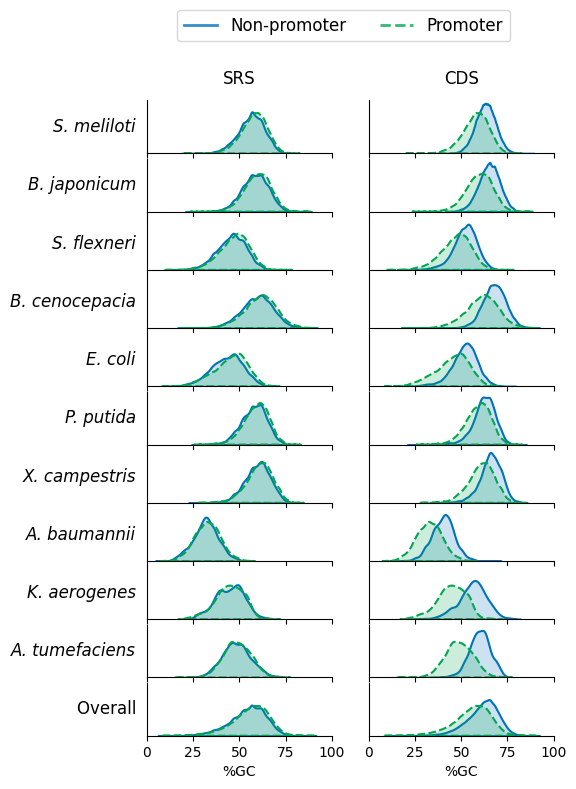

In [32]:
g = sns.FacetGrid(merged_df, row='SpeciesName', hue='label', col="dataset",
                  aspect=3.5, height=0.75, 
                  gridspec_kws={'hspace': 0.1},
                  palette=palette, sharey=True, sharex=True,
                  hue_order=[PROMOTER_CLASS_LABEL_MAP[0], PROMOTER_CLASS_LABEL_MAP[1]],
                  row_order=SELECTED_SPECIES_LABELS + ['Overall'])
g.map(custom_kdeplot, 'gc', bw_adjust=0.8, clip_on=True, fill=True, alpha=0.2, linewidth=1.5)

g.set(yticks=[])
g.set(ylabel=None)
g.set_titles("")

legend_elements = [
    Line2D([0], [0], color=palette[0], lw=2, linestyle='-', label=PROMOTER_CLASS_LABEL_MAP[0], alpha=0.8),
    Line2D([0], [0], color=palette[1], lw=2, linestyle='--', label=PROMOTER_CLASS_LABEL_MAP[1], alpha=0.8),
]
g.figure.legend(handles=legend_elements, title=None, bbox_to_anchor=(0.5, 1), loc='upper center', ncol=2, fontsize=12)

g.set(xticks=range(0, 101, 25), xticklabels=[f'{i}' for i in range(0, 101, 25)], xlabel='GC Percentage')
g.set(xlabel='%GC')

for i, ax in enumerate(g.axes.flat):
    especie_index = i // len(g.col_names)
    label_text = SELECTED_SPECIES_LABELS_OVERALL[especie_index]
    is_italic = label_text != 'Overall'
    if i % len(g.col_names) == 0:
        ax.set_ylabel(label_text + " ", rotation=0, ha='right', va='center', fontsize=12, fontstyle='italic' if is_italic else 'normal')
    else:
        ax.set_ylabel('')

for ax, col_name in zip(g.axes[0], g.col_names):
    ax.set_title(col_name, pad=12, fontsize=12)
        
plt.show()
g.savefig('dataset_gc.pdf')

#### Mean GC content by species and dataset

In [ ]:
cds_dataset_df["gc"] = cds_dataset_df["Sequence"].apply(gc_percentage).apply(lambda x: round(x, 2))
random_dataset_df["gc"] = random_dataset_df["Sequence"].apply(gc_percentage).apply(lambda x: round(x, 2))

In [ ]:
gc_metrics_cds = cds_dataset_df.groupby(["SpeciesName", "label"]).agg({"gc": ["mean"]}).round(2).reset_index()
gc_metrics_random = random_dataset_df.groupby(["SpeciesName", "label"]).agg({"gc": ["mean"]}).round(2).reset_index()

In [ ]:
cds_dataset_df.groupby(["SpeciesName"]).agg({"gc": ["mean", "std"]}).round(2).reset_index()

In [ ]:
random_dataset_df.groupby(["SpeciesName"]).agg({"gc": ["mean", "std"]}).round(2).reset_index()

#### Non-promoters after filtration step

In [44]:
from scripts.preprocess.ensemble import fasta_to_csv

In [45]:
# get species name count by SELECTED_SPECIES in random_dataset_df and cds_dataset_df, only label 1
species_count_random = random_dataset_df[random_dataset_df['label'] == 1]['SpeciesName'].value_counts()
species_count_random = species_count_random[species_count_random.index.isin(SELECTED_SPECIES)]

species_count_cds = cds_dataset_df[cds_dataset_df['label'] == 1]['SpeciesName'].value_counts()
species_count_cds = species_count_cds[species_count_cds.index.isin(SELECTED_SPECIES)]

print("Species count (SRS)")
print(species_count_random)

print("Species count (CDS)")
print(species_count_cds)

Species count (SRS)
Bradyrhizobium japonicum USDA 110             14760
Sinorhizobium meliloti 1021                   14481
Shigella flexneri 5a str. M90T                 9755
Burkholderia cenocepacia J2315                 9655
Pseudomonas putida strain KT2440               6847
Escherichia coli str K-12 substr. MG1655       4920
Xanthomonas campestris pv. campestrie B100     2963
Acinetobacter baumannii ATCC 17978             1111
Agrobacterium tumefaciens str C58               698
Klebsiella aerogenes KCTC 2190                  457
Name: SpeciesName, dtype: int64
Species count (CDS)
Bradyrhizobium japonicum USDA 110             14760
Sinorhizobium meliloti 1021                   14481
Shigella flexneri 5a str. M90T                 9755
Burkholderia cenocepacia J2315                 9655
Pseudomonas putida strain KT2440               6847
Escherichia coli str K-12 substr. MG1655       4920
Xanthomonas campestris pv. campestrie B100     2963
Acinetobacter baumannii ATCC 17978          

In [35]:
PROCESSED_DATA_PATH = "./data/processed"
random_fixed_sample = f'{PROCESSED_DATA_PATH}/random/sample.csv'
cds_sample = f'{PROCESSED_DATA_PATH}/cds/sample.csv'

random_fixed_fasta_filename = f'{PROCESSED_DATA_PATH}/random/sample_cross_filtered.fasta'
cds_fasta_filename = f'{PROCESSED_DATA_PATH}/cds/sample_cross_filtered.fasta'
promoters_filename = f'{PROCESSED_DATA_PATH}/pmd_promoters_filtered.fasta'


random_fixed_filtered_df = fasta_to_csv(random_fixed_fasta_filename, label=0)
cds_filtered_df = fasta_to_csv(cds_fasta_filename, label=0)
promoters_df = fasta_to_csv(promoters_filename, label=1)

random_fixed_sample_df = pd.read_csv(random_fixed_sample)
cds_sample_df = pd.read_csv(cds_sample)

In [36]:
def get_before_after_filtering_count(before_df, after_df):
    before_df_species = before_df['SpeciesName'].value_counts()
    after_df_species = after_df['SpeciesName'].value_counts()

    merge_df = pd.concat([before_df_species, after_df_species], axis=1)
    merge_df.columns = ['before', 'after']
    merge_df = merge_df.fillna(0).astype(int)
    merge_df = merge_df.sort_index()
    merge_df = merge_df[merge_df.index.isin(SELECTED_SPECIES)]

    #add total row
    merge_df.loc['Total'] = merge_df.sum()

    return merge_df

In [37]:
get_before_after_filtering_count(random_fixed_sample_df, random_fixed_filtered_df)

,before,after
Acinetobacter baumannii ATCC 17978,3080,3018
Agrobacterium tumefaciens str C58,1412,1400
Bradyrhizobium japonicum USDA 110,31866,31691
Burkholderia cenocepacia J2315,21662,21379
Escherichia coli str K-12 substr. MG1655,17232,17110
Klebsiella aerogenes KCTC 2190,1526,1517
Pseudomonas putida strain KT2440,15876,15702
Shigella flexneri 5a str. M90T,28102,27974
Sinorhizobium meliloti 1021,34006,33944
Xanthomonas campestris pv. campestrie B100,6134,6054


In [46]:
get_before_after_filtering_count(cds_sample_df, cds_filtered_df)

,before,after
Acinetobacter baumannii ATCC 17978,3080,2993
Agrobacterium tumefaciens str C58,1412,1389
Bradyrhizobium japonicum USDA 110,31866,27445
Burkholderia cenocepacia J2315,21662,19259
Escherichia coli str K-12 substr. MG1655,17232,11338
Klebsiella aerogenes KCTC 2190,1526,1425
Pseudomonas putida strain KT2440,15876,14040
Shigella flexneri 5a str. M90T,28102,20376
Sinorhizobium meliloti 1021,34006,27211
Xanthomonas campestris pv. campestrie B100,6134,5766
